In [1]:
%load_ext autoreload
%autoreload 2

import MM_Core as mm
import numpy as np


In [2]:
mol_pucker, mol_fem, mol_scatter = mm.Mol('benchmarks/sample_data/'), mm.Mol('benchmarks/sample_data/'), mm.Mol('benchmarks/sample_data/')

mol_scatter.csv('leA3a1.dat',skiprows=2, dtype=str, delimiter=' ')
mol_pucker.gromacs('ang_ring.xvg')
mol_fem.gromacs('fem_angles.xvg')

/media/ryank/ryan_data/github/artdep/MM_Util/plot.py:308: RuntimeWarning: divide by zero encountered in log
  Hall = - R * Temp * np.log(Hall)
/media/ryank/ryan_data/github/artdep/MM_Util/plot.py:325: RuntimeWarning: divide by zero encountered in log
  Hpuck = - R* Temp * np.log(Hpuck)


1C4      47725
4C1          5
1,4B       609
B1,4       125
2,5B       203
B2,5       321
3,6B       214
B3,6       238
1H2          0
2H1          0
2H3          0
3H2          0
3H4          0
4H3          0
4H5          0
5H4          0
5H6          0
6H5          0
6H1          0
1H6          0
1S3        296
3S1          0
5S1          0
1S5          0
6S2          0
2S6          0
1E         180
E1           0
2E          37
E2          47
3E           1
E3           0
4E           0
E4           0
5E           0
E5           0
6E           0
E6           0


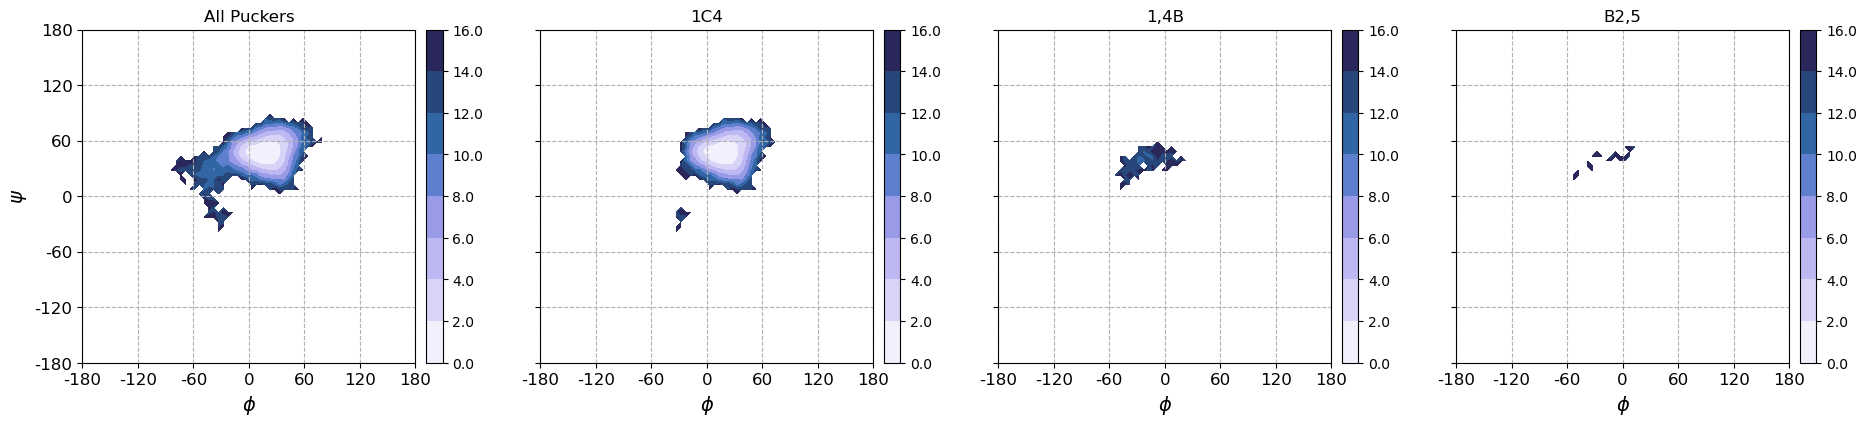

In [3]:
plot = mm.Plot()
plot.cmap(map='devon')
plot.puckers_hist(mol_pucker, mol_fem, puckers=['1C4', '1,4B', 'B2,5'], limit=16)

<string>:3: UserWarning: Input line 2 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.


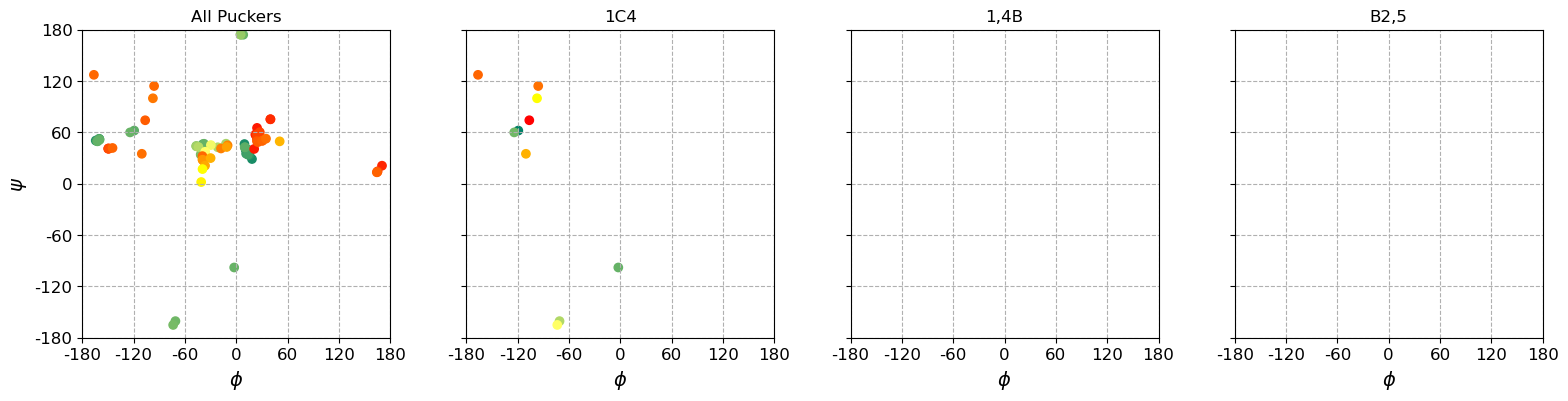

In [8]:
import os
import matplotlib.pyplot as plt
import re
import MM_Core as mm
import numpy as np

# file = 'benchmarks/sample_data/leA3a1.dat'
# data = np.loadtxt(file, skiprows=2, dtype=str)

mol = mm.Mol('sample_data')
mol.csv('leA3a1.dat')

plot = mm.Plot()
plot.puckers_scatter(mol, puckers=['1C4', '1,4B', 'B2,5'])

In [5]:
scatter_data = mol.data

ncol = len(scatter_data[0])

puckers = scatter_data[:, ncol - 1] # Puckers are always last.
energy = scatter_data[:, ncol - 2].astype(float) # E is always 2nd last.
psi_phi = scatter_data[:, 1:ncol - 2].astype(float) # Psi_Phi is everything in between. 
conf = scatter_data[:, 0] # _id is always first.

psi = psi_phi[:, 1::2]
phi = psi_phi[:, ::2]

no_datasets = int(np.shape(psi[1])[0])
